In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
path="/media/linzhenpeng/资料/数据集/消费金融场景下的用户购买预测/"
trainpath=path+"train/"
testpath=path+"test/"
train_agg=trainpath+"train_agg.csv"
train_flg=trainpath+"train_flg.csv"
train_log=trainpath+"train_log.csv"
test_agg=testpath+"test_agg.csv"
test_log=testpath+"test_log.csv"

In [60]:
df_t_agg=pd.read_csv(train_agg,sep="\t")
df_t_agg.set_index("USRID",inplace=True)
df_t_flg=pd.read_csv(train_flg,sep="\t")
df_t_flg.set_index("USRID",inplace=True)
data=pd.merge(df_t_agg,df_t_flg,left_index=True,right_index=True,how="inner")

In [61]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,FLAG
USRID,,,,,,,,,,,,,,,,,,,,,
14233,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,-0.29641,-0.18761,-0.48351,-0.53051,...,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.27221,-0.51336,-0.32438,0
790,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,0.37601,-0.10030,-0.16694,-0.31897,...,0.15815,-0.16201,0.4762,-0.50058,-0.77398,-0.25708,-0.37907,-0.52723,-0.32438,0
82308,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.57176,0.03980,-0.17089,-0.38610,-0.46000,...,0.15815,-0.16201,0.4762,-0.55127,-0.77398,-0.25708,-0.57113,-0.54758,-0.32438,0
90325,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.30291,-0.29641,-0.18761,-0.45916,-0.53051,...,0.15815,-0.16201,0.4762,-0.26154,-0.77398,0.23440,-0.32873,-0.51951,-0.32438,0
71893,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.16849,-0.29641,-0.18761,-0.50786,-0.60103,...,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.57910,-0.54884,-0.32438,0


In [31]:
df_t_agg.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
USRID,,,,,,,,,,,,,,,,,,,,,
14233,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,-0.29641,-0.18761,-0.48351,-0.53051,...,-0.22881,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.27221,-0.51336,-0.32438
790,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,0.37601,-0.10030,-0.16694,-0.31897,...,-0.22881,0.15815,-0.16201,0.4762,-0.50058,-0.77398,-0.25708,-0.37907,-0.52723,-0.32438
82308,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.57176,0.03980,-0.17089,-0.38610,-0.46000,...,-0.22881,0.15815,-0.16201,0.4762,-0.55127,-0.77398,-0.25708,-0.57113,-0.54758,-0.32438
90325,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.30291,-0.29641,-0.18761,-0.45916,-0.53051,...,-0.22881,0.15815,-0.16201,0.4762,-0.26154,-0.77398,0.23440,-0.32873,-0.51951,-0.32438
71893,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.16849,-0.29641,-0.18761,-0.50786,-0.60103,...,-0.22881,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.57910,-0.54884,-0.32438


In [33]:
df_t_agg.nunique()

V1       335
V2         2
V3        20
V4         2
V5         2
V6        60
V7        77
V8     10255
V9       403
V10      412
V11    36182
V12      209
V13      343
V14     3697
V15    29290
V16       28
V17       77
V18    47891
V19    35751
V20    45430
V21    13957
V22       35
V23     5117
V24    32899
V25    43616
V26       47
V27    13383
V28    46680
V29    14293
V30       68
dtype: int64

In [15]:
df_t_agg.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,-0.001843,-0.001311,0.000629,0.001473,-0.000516,0.000663,0.000542,-0.001173,0.000695,0.001036,...,0.000950,-0.000132,-0.000384,0.003030,-0.000797,-0.001609,0.001796,-0.001817,-0.001736,0.000157
std,0.971491,0.999873,1.000310,0.997673,0.999804,1.001168,1.009012,1.001755,1.005994,1.006116,...,0.997089,0.972081,0.996350,0.998737,0.998908,0.991190,1.005999,0.992198,0.934959,1.019556
min,-1.925540,-0.906890,-1.266340,-3.457850,-0.684540,-1.840600,-81.658500,-10.745770,-2.626420,-2.152320,...,-0.741150,-0.779540,-0.798640,-66.324820,-0.559170,-0.773980,-0.508900,-21.583880,-0.859970,-1.132130
25%,-0.420430,-0.906890,-0.378350,0.289200,-0.684540,-0.630800,-0.296410,-0.187610,-0.507860,-0.530510,...,-0.228810,-0.779540,-0.162010,0.001177,-0.556500,-0.263680,-0.257080,-0.570758,-0.479920,-0.324380
50%,-0.160930,-0.906890,-0.378350,0.289200,-0.684540,-0.227530,-0.296410,-0.187610,-0.410450,-0.365980,...,-0.228810,0.158150,-0.162010,0.349730,-0.417390,-0.263680,-0.257080,-0.397805,-0.303620,-0.324380
75%,0.124520,1.102660,-0.023160,0.289200,1.460830,0.444590,0.039800,-0.162300,0.027870,0.080600,...,-0.211877,0.158150,-0.162010,0.468992,0.072123,0.246620,-0.187180,0.104813,0.098350,0.079490
max,54.126760,1.102660,2.108010,0.289200,1.460830,7.703430,71.651890,66.949190,51.311760,48.734890,...,43.276870,92.989580,45.945380,0.476200,12.483970,51.786890,36.857460,14.714840,28.502620,76.815630


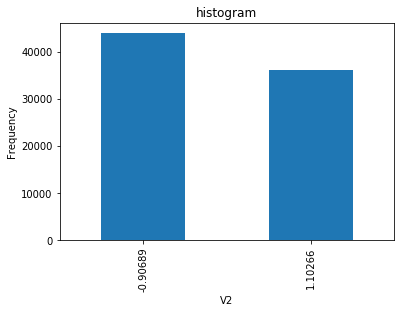

In [43]:
plat_agg("V2")#性别

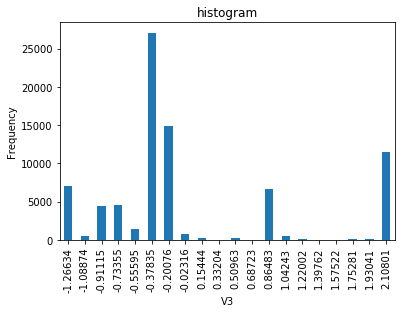

In [44]:
plat_agg("V3")

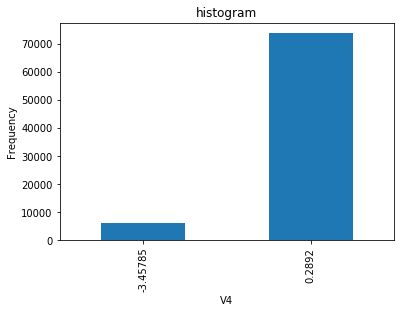

In [45]:
plat_agg("V4")

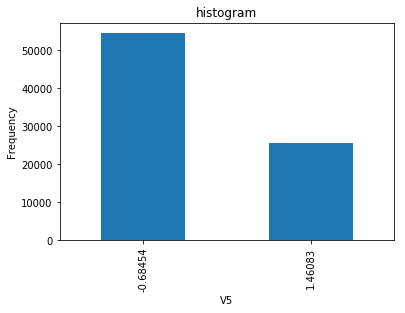

In [46]:
plat_agg("V5")

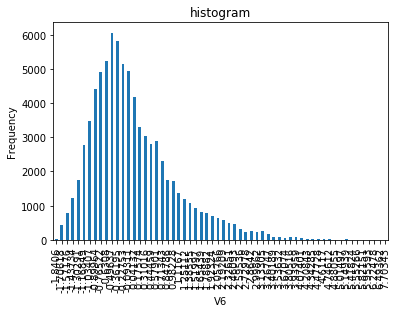

In [47]:
plat_agg("V6")#年龄

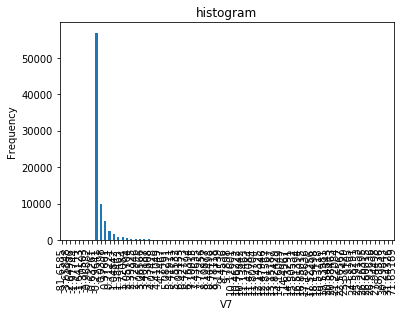

In [48]:
plat_agg("V7")

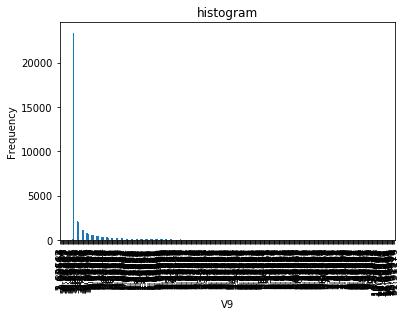

In [49]:
plat_agg("V9")

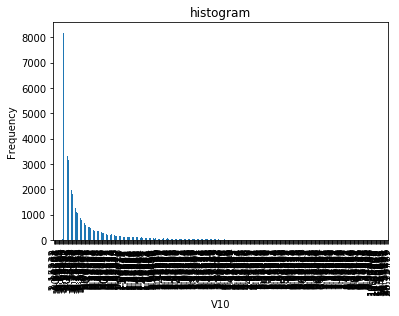

In [50]:
plat_agg("V10")

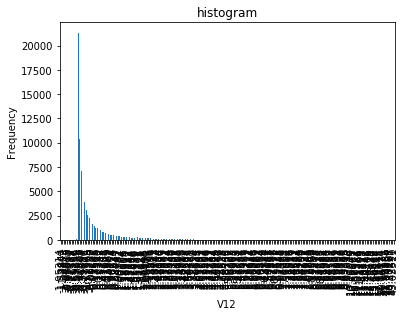

In [51]:
plat_agg("V12")

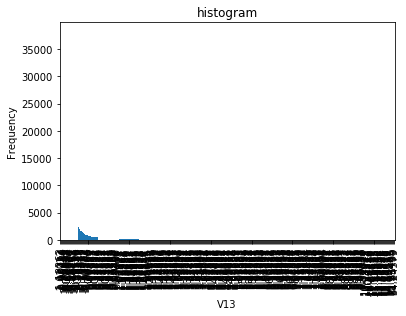

In [52]:
plat_agg("V13")

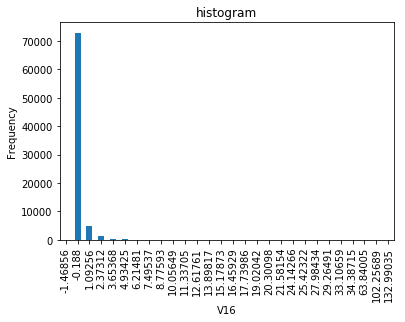

In [53]:
plat_agg("V16")

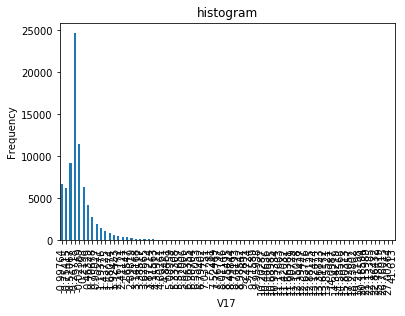

In [54]:
plat_agg("V17")

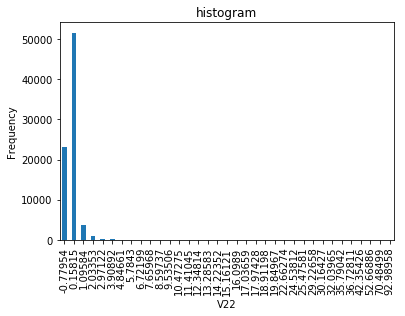

In [55]:
plat_agg("V22")

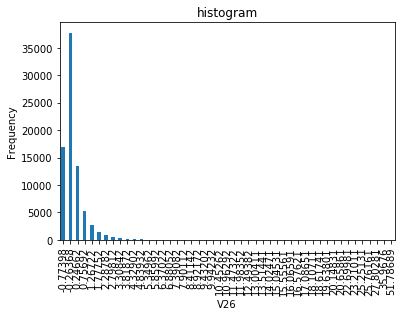

In [56]:
plat_agg("V26")

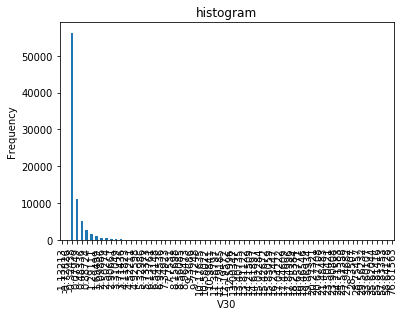

In [57]:
plat_agg("V30")

In [37]:
def plat_agg(c):
    count_flag=pd.value_counts(df_t_agg[c],sort=True).sort_index()
    count_flag.plot(kind="bar")
    plt.title("histogram")
    plt.xlabel(c)
    plt.ylabel("Frequency")

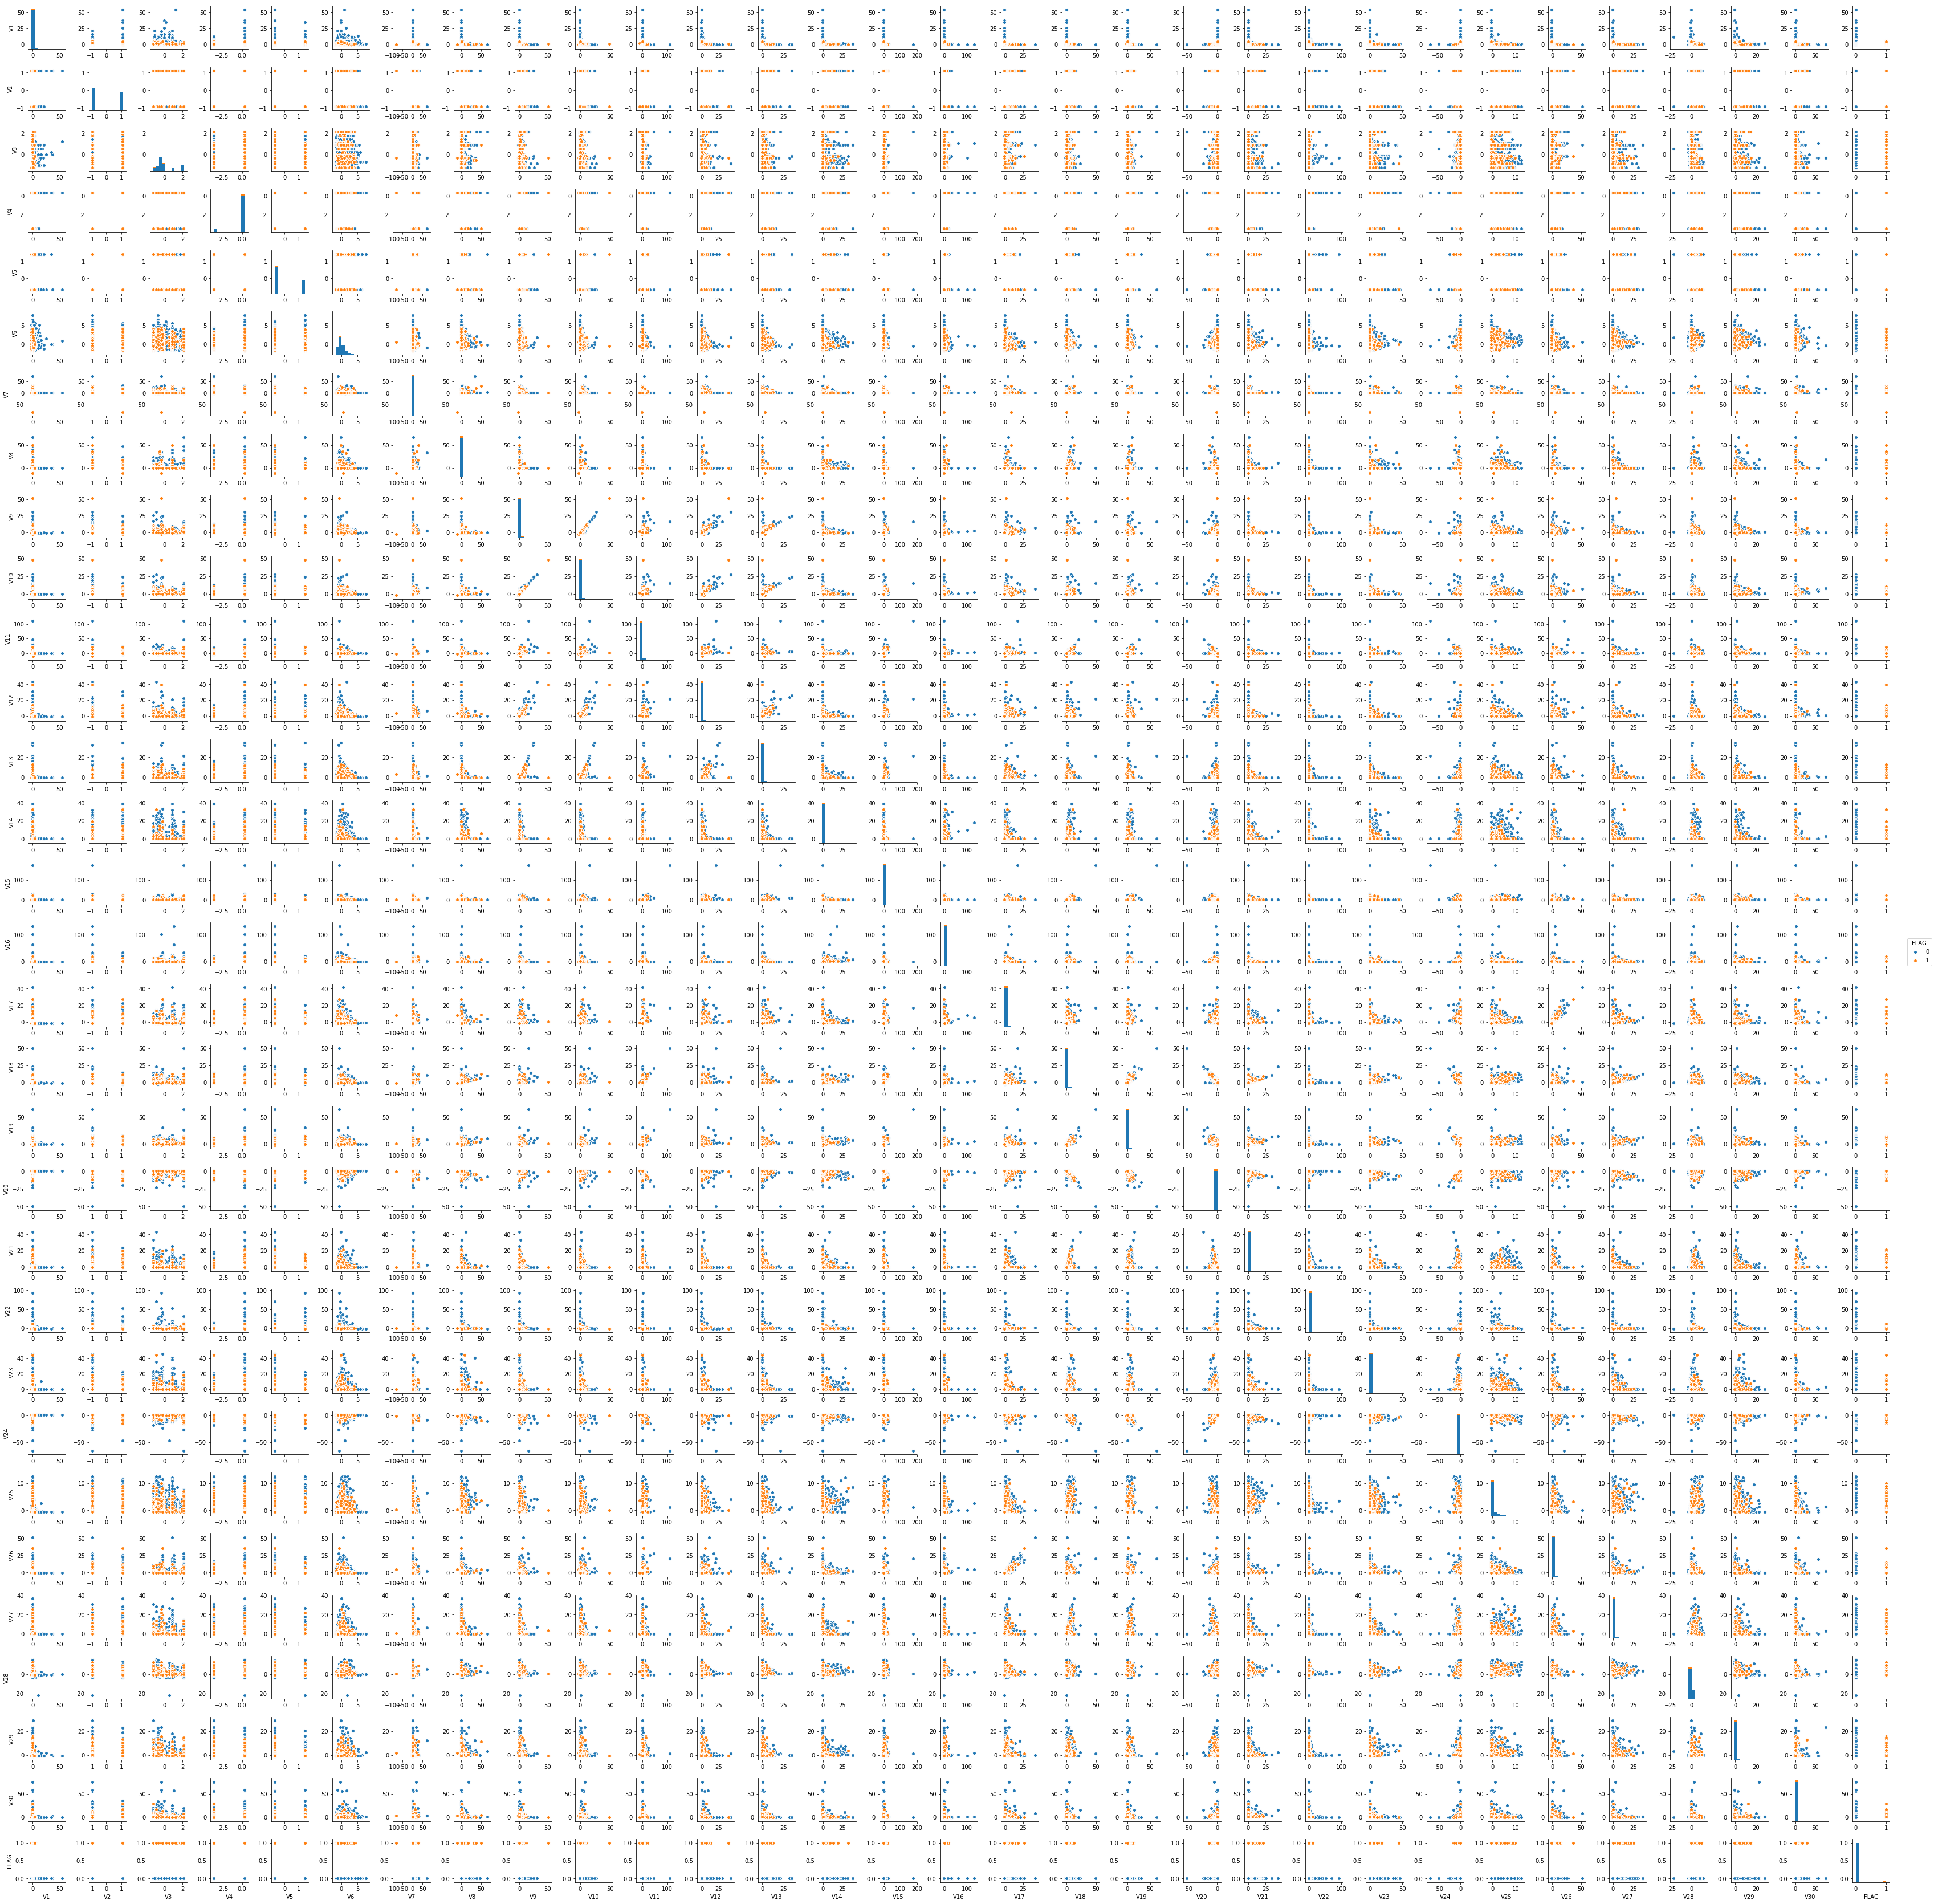

In [64]:
columns =data.columns
sns.pairplot(data[columns],hue='FLAG',size=1.5);

In [65]:
columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'FLAG'],
      dtype='object')

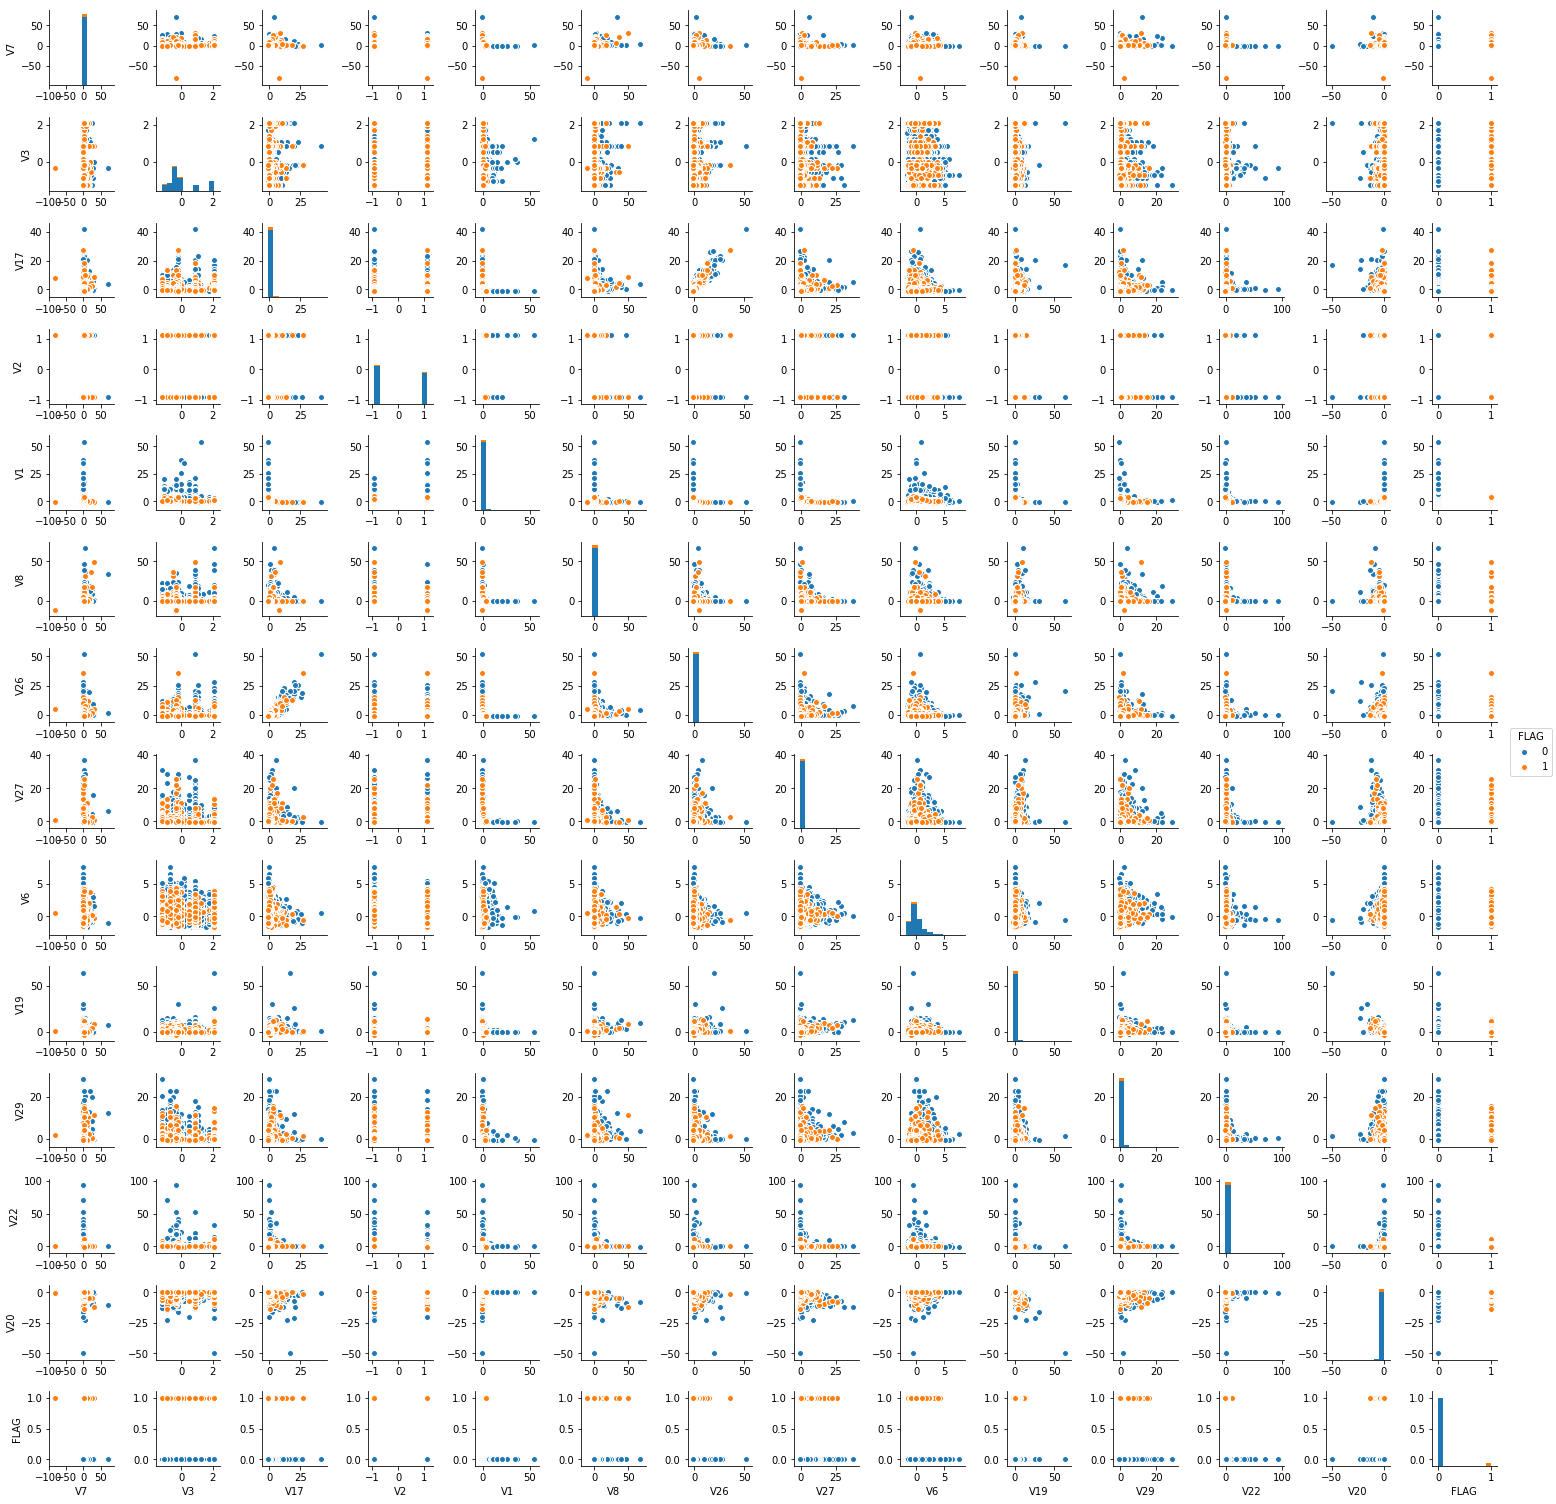

In [67]:
col =["V7","V3","V17","V2","V1","V8","V26","V27","V6","V19","V29","V22","V20","FLAG"]
sns.pairplot(data[col],hue='FLAG',size=1.5);

In [113]:
df_t_agg["V6_int"].value_counts(sort=False).sort_index()

0      443
1      778
2     1216
4     1761
5     2775
6     3479
7     4400
8     4912
9     5242
10    6066
11    5810
12    5142
13    4940
14    4168
15    3303
16    3036
17    2798
18    2904
19    2317
20    1749
21    1705
22    1377
23    1206
24    1073
25     932
26     815
27     796
28     702
29     631
30     582
31     481
32     467
33     301
34     237
35     243
36     229
37     265
38     180
39      81
40      89
41      55
42      70
43      72
44      44
45      30
46      24
47      20
48      24
49       8
50       4
51       3
52       6
54       1
55       2
57       1
58       2
60       1
62       1
71       1
Name: V6_int, dtype: int64

In [112]:
df_t_agg["V6_int"]=df_t_agg["V6"].map(lambda x:(int)((x+1.84060)/0.13442))

In [119]:
bins=[0,5,16,26,36,100]
pd.cut(df_t_agg["V6_int"],bins=bins,include_lowest=True)

USRID
14233    (-0.001, 5.0]
790      (-0.001, 5.0]
82308    (-0.001, 5.0]
90325    (-0.001, 5.0]
71893    (-0.001, 5.0]
83816    (-0.001, 5.0]
10878    (-0.001, 5.0]
80048    (-0.001, 5.0]
45167    (-0.001, 5.0]
34303    (-0.001, 5.0]
17584    (-0.001, 5.0]
8902       (5.0, 16.0]
74384      (5.0, 16.0]
29896      (5.0, 16.0]
4139       (5.0, 16.0]
24536      (5.0, 16.0]
27939      (5.0, 16.0]
24690      (5.0, 16.0]
30269      (5.0, 16.0]
98310      (5.0, 16.0]
23915      (5.0, 16.0]
31122      (5.0, 16.0]
20502      (5.0, 16.0]
5507       (5.0, 16.0]
34743      (5.0, 16.0]
28629      (5.0, 16.0]
30330      (5.0, 16.0]
58169      (5.0, 16.0]
10554      (5.0, 16.0]
81778      (5.0, 16.0]
             ...      
51103      (5.0, 16.0]
72095      (5.0, 16.0]
6029      (26.0, 36.0]
81088     (16.0, 26.0]
20569    (-0.001, 5.0]
95834      (5.0, 16.0]
51132    (-0.001, 5.0]
98344     (16.0, 26.0]
23380      (5.0, 16.0]
24407      (5.0, 16.0]
40787      (5.0, 16.0]
72041      (5.0, 16.0]
71713

In [134]:
df_t_agg.V6.value_counts().sort_index()

-1.84060      22
-1.70618     421
-1.57176     778
-1.43734    1216
-1.30291    1761
-1.16849    2775
-1.03407    3479
-0.89964    4400
-0.76522    4912
-0.63080    5242
-0.49637    6066
-0.36195    5810
-0.22753    5142
-0.09311    4940
 0.04132    4168
 0.17574    3303
 0.31016    3036
 0.44459    2798
 0.57901    2904
 0.71343    2317
 0.84786    1749
 0.98228    1705
 1.11670    1377
 1.25112    1206
 1.38555    1073
 1.51997     932
 1.65439     815
 1.78882     796
 1.92324     702
 2.05766     631
 2.19209     582
 2.32651     481
 2.46093     467
 2.59536     301
 2.72978     237
 2.86420     243
 2.99862     229
 3.13305     265
 3.26747     180
 3.40189      81
 3.53632      89
 3.67074      55
 3.80516      70
 3.93959      72
 4.07401      44
 4.20843      30
 4.34285      24
 4.47728      20
 4.61170      24
 4.74612       8
 4.88055       4
 5.01497       3
 5.14939       6
 5.41824       1
 5.55266       2
 5.82151       1
 5.95593       2
 6.22478       1
 6.49362      

In [19]:
df_t_flg=pd.read_csv(train_flg,sep="\t")

In [20]:
df_t_flg.head()

,USRID,FLAG
0,0,0
1,35,0
2,42,0
3,76,0
4,77,0


In [27]:
print(df_t_flg[df_t_flg["FLAG"]==1].count())
print(df_t_flg[df_t_flg["FLAG"]==0].count())

USRID    3176
FLAG     3176
dtype: int64
USRID    76824
FLAG     76824
dtype: int64


Text(0,0.5,'Frequency')

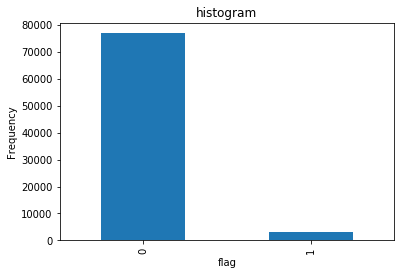

In [25]:
count_flag=pd.value_counts(df_t_flg['FLAG'],sort=True).sort_index()
count_flag.plot(kind="bar")
plt.title("histogram")
plt.xlabel("flag")
plt.ylabel("Frequency")

### 特征选择

In [127]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,FLAG
USRID,,,,,,,,,,,,,,,,,,,,,
14233,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,-0.29641,-0.18761,-0.48351,-0.53051,...,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.27221,-0.51336,-0.32438,0
790,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.70618,0.37601,-0.10030,-0.16694,-0.31897,...,0.15815,-0.16201,0.4762,-0.50058,-0.77398,-0.25708,-0.37907,-0.52723,-0.32438,0
82308,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.57176,0.03980,-0.17089,-0.38610,-0.46000,...,0.15815,-0.16201,0.4762,-0.55127,-0.77398,-0.25708,-0.57113,-0.54758,-0.32438,0
90325,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.30291,-0.29641,-0.18761,-0.45916,-0.53051,...,0.15815,-0.16201,0.4762,-0.26154,-0.77398,0.23440,-0.32873,-0.51951,-0.32438,0
71893,-1.92554,-0.90689,-1.26634,0.2892,-0.68454,-1.16849,-0.29641,-0.18761,-0.50786,-0.60103,...,0.15815,-0.16201,0.4762,-0.55917,-0.77398,-0.25708,-0.57910,-0.54884,-0.32438,0


In [133]:
data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,FLAG
V1,1.000000,0.038288,0.041991,0.015996,-0.000009,0.065279,-0.053799,-0.039812,-0.101425,-0.118969,...,-0.001859,-0.031725,0.124099,-0.111287,-0.215921,-0.052419,-0.094462,-0.047598,-0.056858,-0.038479
V2,0.038288,1.000000,0.002442,0.008328,0.050598,0.002878,0.013288,-0.027401,0.066804,0.060147,...,-0.026890,-0.026670,0.027098,-0.029093,0.009591,-0.000236,-0.040866,-0.009643,-0.008760,0.033167
V3,0.041991,0.002442,1.000000,0.013284,-0.003907,-0.066362,0.002091,0.021696,-0.028731,-0.024773,...,0.002543,0.013548,-0.048822,0.034931,0.053317,0.023004,0.043264,-0.014266,-0.000613,0.009077
V4,0.015996,0.008328,0.013284,1.000000,0.108459,-0.003851,-0.163085,-0.018580,-0.169471,-0.181794,...,-0.063399,-0.015952,0.045067,-0.046129,-0.038000,-0.013354,-0.043452,-0.130685,-0.029527,-0.077212
V5,-0.000009,0.050598,-0.003907,0.108459,1.000000,-0.004411,-0.053792,-0.039396,-0.100026,-0.112454,...,-0.452802,-0.040995,0.098734,-0.116454,-0.099902,-0.045708,-0.109424,-0.126913,-0.040455,-0.047205
V6,0.065279,0.002878,-0.066362,-0.003851,-0.004411,1.000000,0.036895,0.026279,-0.010192,0.008805,...,0.009456,0.026278,-0.061219,0.051208,-0.030157,0.043605,0.057795,0.197579,0.098766,-0.016155
V7,-0.053799,0.013288,0.002091,-0.163085,-0.053792,0.036895,1.000000,0.320220,0.153589,0.256147,...,0.031127,0.111929,-0.136692,0.114087,0.120564,0.101608,0.102624,0.167613,0.199102,0.131976
V8,-0.039812,-0.027401,0.021696,-0.018580,-0.039396,0.026279,0.320220,1.000000,-0.001916,0.048910,...,0.033320,0.215190,-0.281255,0.244230,0.143291,0.152015,0.219057,0.204854,0.071133,0.022540
V9,-0.101425,0.066804,-0.028731,-0.169471,-0.100026,-0.010192,0.153589,-0.001916,1.000000,0.976850,...,0.057590,0.016096,-0.143559,0.123057,0.167979,0.001850,0.114044,0.176211,0.035843,0.100110
V10,-0.118969,0.060147,-0.024773,-0.181794,-0.112454,0.008805,0.256147,0.048910,0.976850,1.000000,...,0.067042,0.051989,-0.205340,0.178544,0.222886,0.058348,0.166290,0.221826,0.142418,0.106591


In [132]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

train = data[data['FLAG']!=-1]
test = data[data['FLAG']==-1]
train=train.fillna(0)
test=test.fillna(0)

# train_userid = train.pop('USRID')
y = train.pop('FLAG')
col = train.columns
X = train[col].values

X_new=SelectKBest(chi2,25).fit_transform(X,y)

X_new.shape

ValueError: Input X must be non-negative.